In [1]:
!pip install seaborn==0.9.0

  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)


  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:



ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\seaborn-0.11.2.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
renome = {
    "price": "preco",
    "expected_hours": "horas",
    "unfinished": "nao_finalizado"
}

dados = dados.rename(columns= renome)
dados.head()

,nao_finalizado,horas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0: 1,
    1: 0
}
dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas', ylabel='preco'>

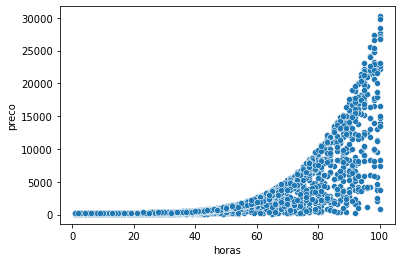

In [5]:
import seaborn as sns

sns.scatterplot(x= "horas", y= "preco", data = dados)

<AxesSubplot:xlabel='horas', ylabel='preco'>

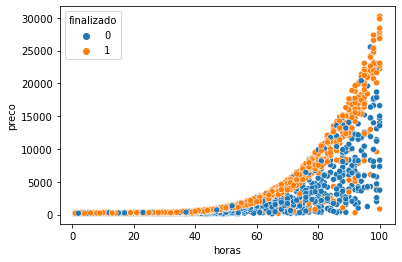

In [6]:
sns.scatterplot(x="horas", y="preco", hue="finalizado", data=dados)

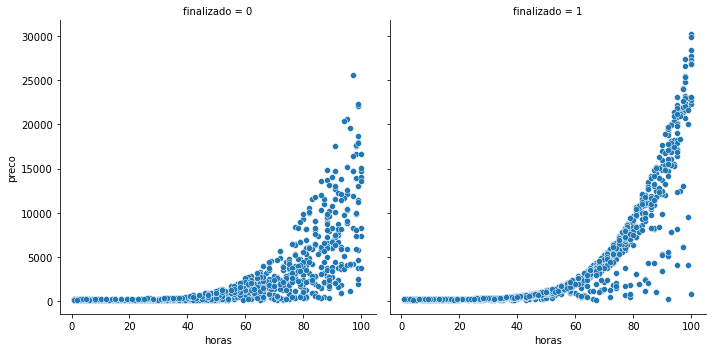

In [7]:
sns.relplot(x="horas", y="preco", col="finalizado", data=dados)

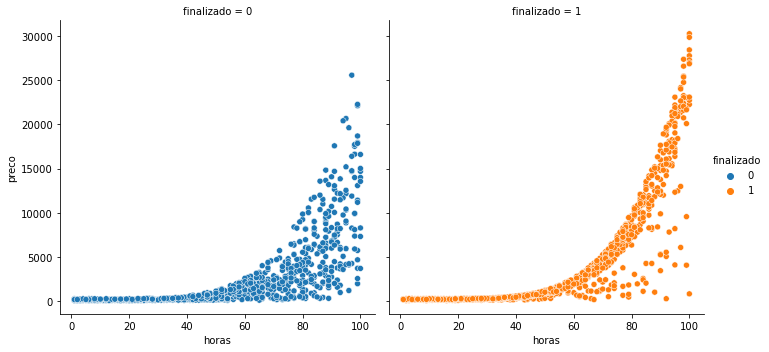

In [8]:
sns.relplot(x="horas", y="preco", col="finalizado", hue="finalizado",data=dados)

In [9]:
x = dados[['horas', 'preco']]
y = dados['finalizado']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 1

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.44%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
import numpy as np
baseline = np.ones(540)

In [12]:
acuracia_base = accuracy_score(teste_y, baseline) * 100
print("A acurácia foi %.2f%%" % acuracia_base)

A acurácia foi 52.59%


<AxesSubplot:xlabel='horas', ylabel='preco'>

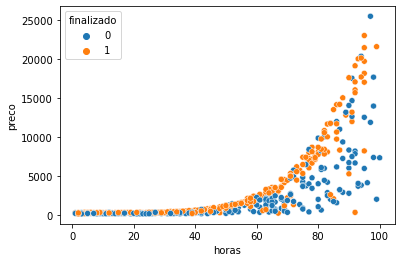

In [13]:
sns.scatterplot(x="horas", y="preco", hue=teste_y, data=teste_x)

In [14]:
x_min = teste_x.horas.min()
x_max = teste_x.horas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 25545


In [15]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [17]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [18]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

In [19]:
import matplotlib.pyplot as plt

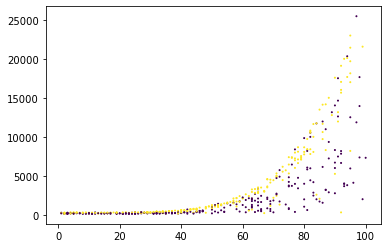

In [20]:
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=1)

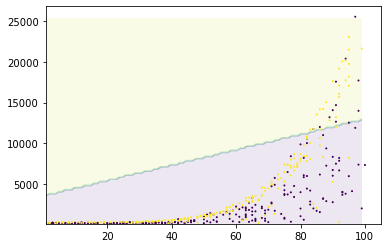

In [21]:
plt.contourf(xx, yy, z, alpha = 0.1)
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=1)